# Initial data exploration

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [21]:
#libary import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.visualization.visualization import display_pictures, plot_data_distribution
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_set_train = pd.read_csv("../data/raw/emnist-digits-train.csv",header=None)
data_set_valid = pd.read_csv("../data/raw/emnist-digits-test.csv", header=None)

In [4]:
data_set_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,240000.000000,240000.0,240000.0,240000.0,240000.0,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,...,240000.0,240000.000000,240000.000000,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0,240000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.000075,0.000529,0.000529,0.000542,0.000508,...,0.0,0.000138,0.000138,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872287,0.0,0.0,0.0,0.0,0.036742,0.259238,0.259238,0.257326,0.241005,...,0.0,0.067361,0.067361,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,18.000000,127.000000,127.000000,126.000000,118.000000,...,0.0,33.000000,33.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#only use a small sample of the data
sampled_data_set = data_set_train.iloc[:1]
print("sampled data shape :",sampled_data_set.shape)

sampled data shape : (1, 785)


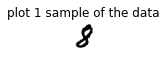

In [6]:
display_pictures(sampled_data_set,28,28,2,1)

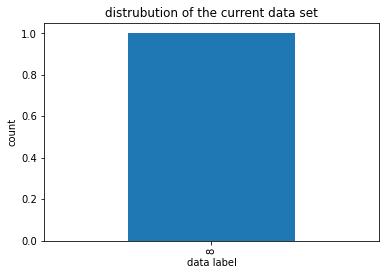

In [7]:
plot_data_distribution(sampled_data_set,0)

In [8]:
X_train = data_set_train.iloc[:,1:]
y_train = data_set_train.iloc[:,0]
y_train_OHE = pd.get_dummies(y_train)

X_valid = data_set_valid.iloc[:,1:]
y_valid = data_set_valid.loc[:,0]
y_valid_OHE = pd.get_dummies(y_valid)

print(X_train.shape)
print(y_train_OHE.shape)
print(X_valid.shape)
print(y_valid_OHE.shape)

(240000, 784)
(240000, 10)
(40000, 784)
(40000, 10)


In [16]:

model = keras.Sequential([
    layers.Dense(90, activation='sigmoid', input_shape=[784]),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 90)                70650     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                910       
Total params: 71,560
Trainable params: 71,560
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(
    X_train, y_train_OHE,
    validation_data=(X_valid, y_valid_OHE),
    batch_size=1000,
    epochs=10,
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5

Epoch 1/10
240/240 [==============================] - 5s 17ms/step - loss: 0.2178 - accuracy: 0.9433 - val_loss: 0.2026 - val_accuracy: 0.9445

In [11]:
history_df.describe()

,loss,accuracy,val_loss,val_accuracy
count,50.000000,50.000000,50.000000,50.000000
mean,0.155052,0.975227,0.125105,0.971391
std,0.487666,0.016863,0.070949,0.012248
min,0.056431,0.891117,0.091711,0.912025
25%,0.060800,0.975882,0.099729,0.972119
50%,0.068586,0.981090,0.109841,0.975688
75%,0.085755,0.983315,0.117805,0.976600
max,3.511328,0.984529,0.546696,0.978775


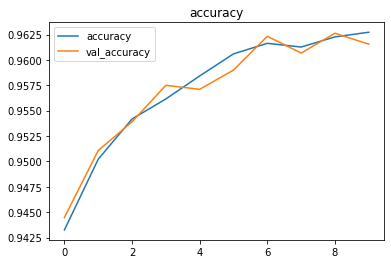

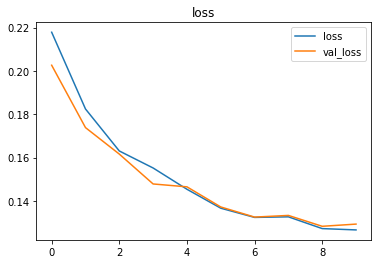

In [19]:
history_df.loc[:,['accuracy','val_accuracy']].plot(title="accuracy")
history_df.loc[:,['loss','val_loss']].plot(title="loss")
plt.show()

In [35]:
print(f"best val accuracy is {history_df['val_accuracy'].max()} and best val loss is {history_df['val_loss'].min()}")

best val accuracy is 0.9626250267028809 and best val loss is 0.12828290462493896


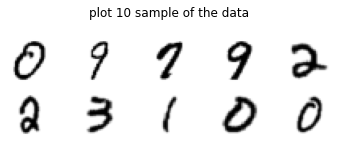

0


In [25]:
display_pictures(data_set_valid.iloc[:10],28,28,2,5)
prediction = model.predict(X_valid.iloc[:10])

#print(f"prediction {prediction} | real value {y_valid.iloc[0]}")

In [34]:
print(np.argmax(prediction[9]))

0


In [37]:
#create a callback function
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True
                                         ,mode="min", min_delta=0.001)

history = model.fit(
    X_train, y_train_OHE,
    validation_data=(X_valid, y_valid_OHE),
    batch_size=1000,
    epochs=100,
    callbacks=[callback]
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5

Epoch 1/100
240/240 [==============================] - 5s 20ms/step - loss: 0.1030 - accuracy: 0.9691 - val_loss: 0.1060 - val_accuracy: 0.9682

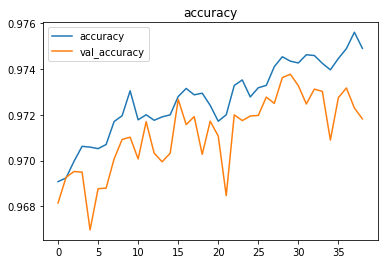

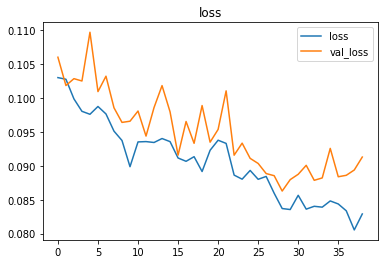

In [38]:
history_df.loc[:,['accuracy','val_accuracy']].plot(title="accuracy")
history_df.loc[:,['loss','val_loss']].plot(title="loss")
plt.show()

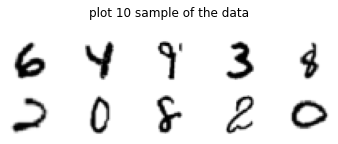

In [50]:
display_pictures(data_set_valid.iloc[10:20],28,28,2,5)
prediction = model.predict(X_valid.iloc[10:20])

In [61]:
print(np.argmax(prediction[0]))

0
